# Exploratory Data Analysis on US Consumer Finance Complaints

## Introduction
This notebook performs exploratory data analysis (EDA) on the US Consumer Finance Complaints dataset. The goal is to understand the nature of the complaints and identify any patterns or trends in the data.

## Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster
from scripts.utility import set_multiple_columns_datatype

## Load data

In [3]:
# Load the dataset
data_path = "../data/consumer_complaints.csv"
df = pd.read_csv(data_path, dtype={'column_5': str, 'column_11': str}, low_memory=False)
df = df.drop(columns=['complaint_id'])

#Sampling the data
df = df.sample(frac = 0.05)

# Display the first few rows of the dataframe
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?
309746,10/22/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,Company chooses not to provide a public response,Bank of America,OK,74114,NaN,Consent not provided,Web,10/22/2015,Closed with non-monetary relief,Yes,No
141359,10/28/2014,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,Navy FCU,CA,92019,NaN,NaN,Web,11/03/2014,Closed with non-monetary relief,Yes,No
315546,11/12/2015,Debt collection,Credit card,Taking/threatening an illegal action,Threatened to sue on too old debt,This debt is well over 12 years old. I have no...,Company believes it acted appropriately as aut...,"Neiman, Stone & McCormick , P.C.",IA,523XX,Servicemember,Consent provided,Web,12/29/2015,Closed with explanation,Yes,Yes
231607,04/27/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,"On Friday XXXX XXXX, 2015 I made a payment at ...",Company chooses not to provide a public response,Ally Financial Inc.,GA,300XX,NaN,Consent provided,Web,04/27/2015,Closed with explanation,Yes,No
328347,06/28/2012,Mortgage,Other mortgage,Other,NaN,NaN,NaN,Wells Fargo & Company,FL,33071,NaN,NaN,Postal mail,07/05/2012,Closed with explanation,Yes,No


In [4]:
#Look at the values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27798 entries, 309746 to 541756
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date_received                 27798 non-null  object
 1   product                       27798 non-null  object
 2   sub_product                   20011 non-null  object
 3   issue                         27798 non-null  object
 4   sub_issue                     10585 non-null  object
 5   consumer_complaint_narrative  3338 non-null   object
 6   company_public_response       4239 non-null   object
 7   company                       27798 non-null  object
 8   state                         27541 non-null  object
 9   zipcode                       27560 non-null  object
 10  tags                          3898 non-null   object
 11  consumer_consent_provided     6143 non-null   object
 12  submitted_via                 27798 non-null  object
 13  date_sent_to_co

In [31]:
#There is too many objects in the df, we need to cast some types in order to improve our model
for column in df.columns:
    print(f"**Column: {column}, *Number of unique Values: {len(df[column].unique())}, *Type: {df[column].dtype}\nValues:\n{df[column].unique()}\n")

**Column: date_received, *Number of unique Values: 1587, *Type: datetime64[ns]
Values:
<DatetimeArray>
['2015-10-22 00:00:00', '2014-10-28 00:00:00', '2015-11-12 00:00:00',
 '2015-04-27 00:00:00', '2012-06-28 00:00:00', '2016-02-02 00:00:00',
 '2013-03-04 00:00:00', '2014-08-28 00:00:00', '2013-11-01 00:00:00',
 '2016-03-24 00:00:00',
 ...
 '2012-07-28 00:00:00', '2013-05-12 00:00:00', '2012-02-04 00:00:00',
 '2012-05-13 00:00:00', '2012-09-03 00:00:00', '2013-01-06 00:00:00',
 '2013-08-31 00:00:00', '2012-12-23 00:00:00', '2012-06-23 00:00:00',
 '2011-12-31 00:00:00']
Length: 1587, dtype: datetime64[ns]

**Column: product, *Number of unique Values: 11, *Type: category
Values:
['Mortgage', 'Debt collection', 'Consumer Loan', 'Student loan', 'Credit reporting', ..., 'Bank account or service', 'Money transfers', 'Prepaid card', 'Other financial service', 'Payday loan']
Length: 11
Categories (11, object): ['Bank account or service', 'Consumer Loan', 'Credit card', 'Credit reporting', ...,

In [11]:
    # We are going to correct some data types in order of improving the analysis
    column_types = {
    'company': 'category',
    'company_public_response': 'category',
    'company_response_to_consumer': 'category',
    'consumer_complaint_narrative': 'string',
    'consumer_consent_provided': 'category',
    'consumer_disputed?': 'bool',
    'date_received': 'datetime',
    'date_sent_to_company': 'datetime',
    'issue': 'category',
    'product': 'category',
    'state': 'category',
    'sub_issue': 'category',
    'sub_product': 'category',
    'submitted_via': 'category',
    'tags': 'category',
    'timely_response': 'bool',
    'zipcode': 'string'
}
    
    df = set_multiple_columns_datatype(df, column_types)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27798 entries, 309746 to 541756
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date_received                 27798 non-null  datetime64[ns]
 1   product                       27798 non-null  category      
 2   sub_product                   20011 non-null  category      
 3   issue                         27798 non-null  category      
 4   sub_issue                     10585 non-null  category      
 5   consumer_complaint_narrative  27798 non-null  object        
 6   company_public_response       4239 non-null   category      
 7   company                       27798 non-null  category      
 8   state                         27541 non-null  category      
 9   zipcode                       27798 non-null  object        
 10  tags                          3898 non-null   category      
 11  consumer_consent_provided  

In [13]:
df.describe()

,date_received,date_sent_to_company
count,27798,27798
mean,2014-06-27 23:38:11.474206720,2014-07-02 10:07:26.017699328
min,2011-12-01 00:00:00,2011-12-01 00:00:00
25%,2013-08-11 00:00:00,2013-08-19 00:00:00
50%,2014-08-05 12:00:00,2014-08-09 00:00:00
75%,2015-06-26 00:00:00,2015-06-29 00:00:00
max,2016-04-22 00:00:00,2016-04-25 00:00:00


In [14]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?
309746,2015-10-22,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,nan,Company chooses not to provide a public response,Bank of America,OK,74114,NaN,Consent not provided,Web,2015-10-22,Closed with non-monetary relief,True,False
141359,2014-10-28,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,nan,NaN,Navy FCU,CA,92019,NaN,NaN,Web,2014-11-03,Closed with non-monetary relief,True,False
315546,2015-11-12,Debt collection,Credit card,Taking/threatening an illegal action,Threatened to sue on too old debt,This debt is well over 12 years old. I have no...,Company believes it acted appropriately as aut...,"Neiman, Stone & McCormick , P.C.",IA,523XX,Servicemember,Consent provided,Web,2015-12-29,Closed with explanation,True,True
231607,2015-04-27,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,"On Friday XXXX XXXX, 2015 I made a payment at ...",Company chooses not to provide a public response,Ally Financial Inc.,GA,300XX,NaN,Consent provided,Web,2015-04-27,Closed with explanation,True,False
328347,2012-06-28,Mortgage,Other mortgage,Other,NaN,nan,NaN,Wells Fargo & Company,FL,33071,NaN,NaN,Postal mail,2012-07-05,Closed with explanation,True,False


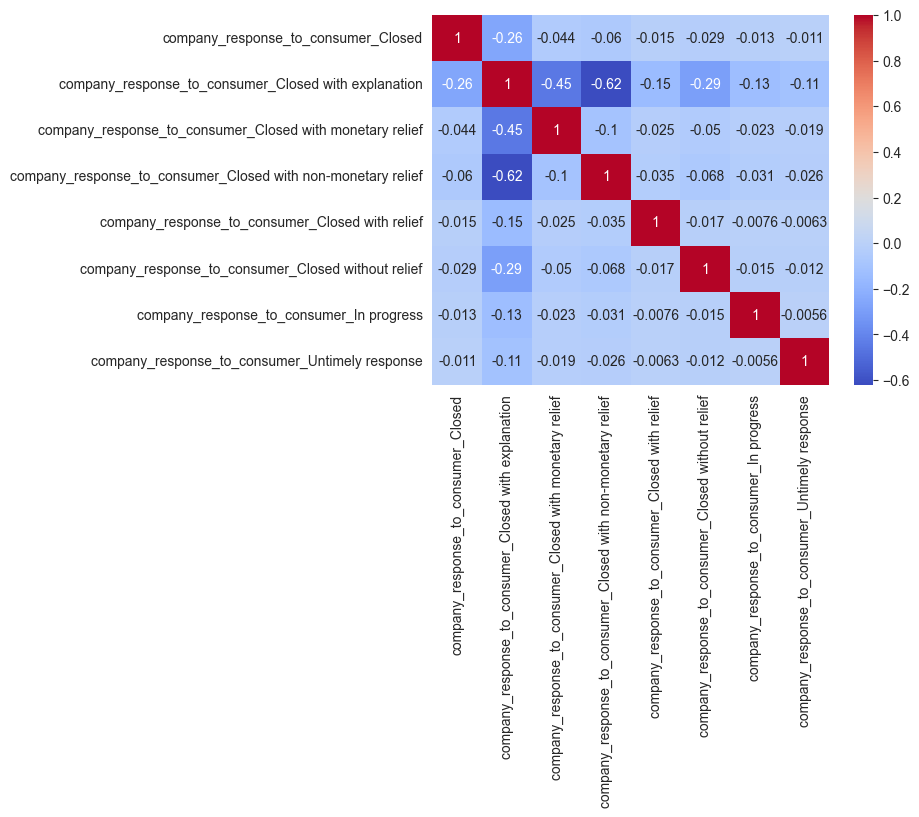